In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline


import datetime
from dateutil.relativedelta import relativedelta

plt.rcParams["figure.figsize"] = (7,4)

## <center> Загрузка данных

In [2]:
data_customer = pd.read_csv("customers.tsv", sep="\t")
data_sales = pd.read_csv("sales.tsv", sep="\t")

In [3]:
data_customer.head() 

,year,month,ira,customers_type,amount_of_customers
0,2017,1,AC,Archer,679.0
1,2017,1,AC,Monk,1070.0
2,2017,1,AC,Dwarf,610.0
3,2017,1,AC,Centaur,1315.0
4,2017,1,AC,Gremlin,1554.0


In [4]:
 data_sales.head()

,year,month,location,ira,product_category,brand,sku_id,item_per_bundle,shape,with_alcohol,filling,volume,price
0,2017,1,Alpha City,AC,Chocolates,Cadbury,sku #79,1,Standart,No,Nothing,4572.0,NaN
1,2017,1,Alpha City,AC,Chocolates,Ferrero Rocher,sku #15,1,Standart,No,Nothing,8028.0,1.221336
2,2017,1,Alpha City,AC,Chocolates,Ferrero Rocher,sku #16,3,Standart,No,Nothing,6606.0,2.866401
3,2017,1,Alpha City,AC,Chocolates,Ferrero Rocher,sku #22,2,Standart,No,Nothing,11688.0,2.093719
4,2017,1,Alpha City,AC,Chocolates,Ferrero Rocher,sku #28,3,Standart,No,Nothing,3582.0,2.866401


In [5]:
data_customer.shape , data_sales.shape

((1980, 5), (1729, 13))

In [7]:
columns = list(data_sales.columns)
columns

['year',
 'month',
 'location',
 'ira',
 'product_category',
 'brand',
 'sku_id',
 'item_per_bundle',
 'shape',
 'with_alcohol',
 'filling',
 'volume',
 'price']

### Товары.

In [8]:
sku_names = data_sales["sku_id"].unique()
sku_names.shape

(43,)

In [9]:
data_sales["sku_id"].value_counts()

sku #30     87
sku #46     80
sku #25     76
sku #73     75
sku #48     74
sku #16     73
sku #28     73
sku #22     73
sku #79     72
sku #41     72
sku #31     71
sku #49     60
sku #38     60
sku #15     60
sku #78     59
sku #42     58
sku #67     57
sku #97     53
sku #76     53
sku #77     53
sku #100    50
sku #106    44
sku #94     39
sku #33     20
sku #82     17
sku #84     17
sku #83     17
sku #81     17
sku #5      16
sku #37     16
sku #72     16
sku #43     16
sku #34     15
sku #7      15
sku #11     13
sku #44     11
sku #3      11
sku #27     10
sku #17      9
sku #105     9
sku #55      5
sku #60      4
sku #98      3
Name: sku_id, dtype: int64

### Время.

In [10]:
data_sales["year"].unique(), data_sales["month"].unique()

(array([2017, 2018, 2019]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]))

### Города.

In [132]:
iras = data_sales["ira"].unique()
iras

array(['AC', 'MN', 'PB', 'VL'], dtype=object)

In [154]:
locations = data_sales["location"].unique()
locations

array(['Alpha City', 'Moon', 'Pirate Bay', 'Village'], dtype=object)

## <center>Рассмотрим один отдельный sku (товар).

In [18]:
data_15_ac = data_sales[(data_sales["sku_id"] ==  "sku #15") & (data_sales["ira"] ==  "AC")][["year", "month", "volume", "price"]]

In [20]:
data_15_ac.head()

,year,month,volume,price
1,2017,1,8028.0,1.221336
52,2017,2,9714.0,1.223776
103,2017,3,10614.0,1.228686
154,2017,4,11646.0,1.240506
207,2017,5,8700.0,1.268904


### Добавим дату и доход.

In [30]:
data_15_ac["day"] = 1

In [34]:
data_15_ac["date"] = pd.to_datetime(data_15_ac[["year", "month", "day"]])

In [35]:
data_15_ac.head()

,year,month,volume,price,day,date
1,2017,1,8028.0,1.221336,1,2017-01-01
52,2017,2,9714.0,1.223776,1,2017-02-01
103,2017,3,10614.0,1.228686,1,2017-03-01
154,2017,4,11646.0,1.240506,1,2017-04-01
207,2017,5,8700.0,1.268904,1,2017-05-01


In [42]:
data_15_ac["profit"]  = data_15_ac[["volume"]] * data_15_ac[["price"]].values

In [43]:
data_15_ac.head()

,year,month,volume,price,day,date,profit
1,2017,1,8028.0,1.221336,1,2017-01-01,9804.885344
52,2017,2,9714.0,1.223776,1,2017-02-01,11887.762238
103,2017,3,10614.0,1.228686,1,2017-03-01,13041.273821
154,2017,4,11646.0,1.240506,1,2017-04-01,14446.936709
207,2017,5,8700.0,1.268904,1,2017-05-01,11039.465507


###  Построим график.

In [107]:
data_15_ac_x = data_15_ac["date"].values
data_15_ac_y = data_15_ac["profit"].values

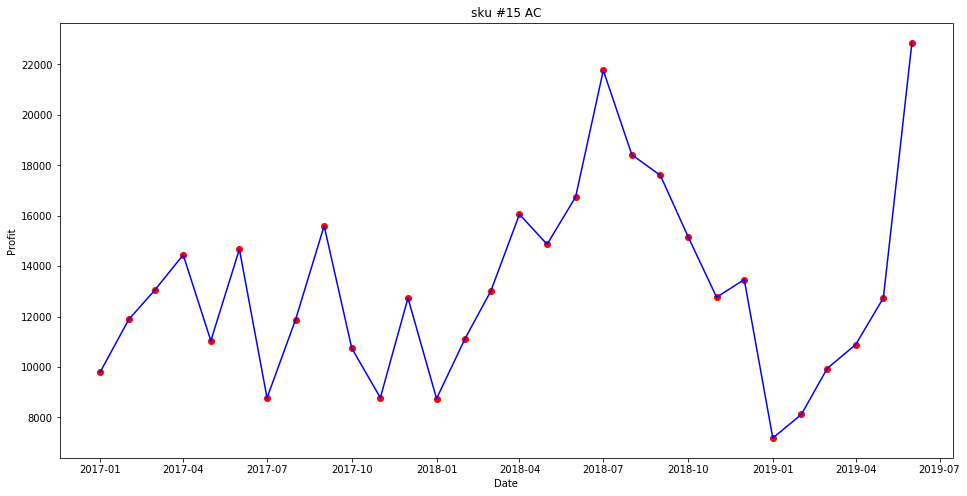

In [137]:
f = plt.figure(figsize=(16,8))
plt.plot(data_15_ac_x, data_15_ac_y, "ro")
plt.plot(data_15_ac_x, data_15_ac_y, "b")
plt.title("sku #15 AC")
plt.xlabel("Date")
plt.ylabel("Profit")
plt.show()

## <center> Построим графики для других sku.

In [155]:
data_sales.head()

,year,month,location,ira,product_category,brand,sku_id,item_per_bundle,shape,with_alcohol,filling,volume,price,day,date,profit
0,2017,1,Alpha City,AC,Chocolates,Cadbury,sku #79,1,Standart,No,Nothing,4572.0,NaN,1,2017-01-01,NaN
1,2017,1,Alpha City,AC,Chocolates,Ferrero Rocher,sku #15,1,Standart,No,Nothing,8028.0,1.221336,1,2017-01-01,9804.885344
2,2017,1,Alpha City,AC,Chocolates,Ferrero Rocher,sku #16,3,Standart,No,Nothing,6606.0,2.866401,1,2017-01-01,18935.443669
3,2017,1,Alpha City,AC,Chocolates,Ferrero Rocher,sku #22,2,Standart,No,Nothing,11688.0,2.093719,1,2017-01-01,24471.385842
4,2017,1,Alpha City,AC,Chocolates,Ferrero Rocher,sku #28,3,Standart,No,Nothing,3582.0,2.866401,1,2017-01-01,10267.447657


### Добавим дату и доход.

In [128]:
data_sales["day"] = 1;
data_sales["date"] = pd.to_datetime(data_sales[["year", "month", "day"]]);
data_sales["profit"]  = data_sales[["volume"]] * data_sales[["price"]].values;

### Рассмотрим отдельно продажи в разных городах.

### AC - Alpha city

In [134]:
df = data_sales[data_sales["ira"] == "AC"];

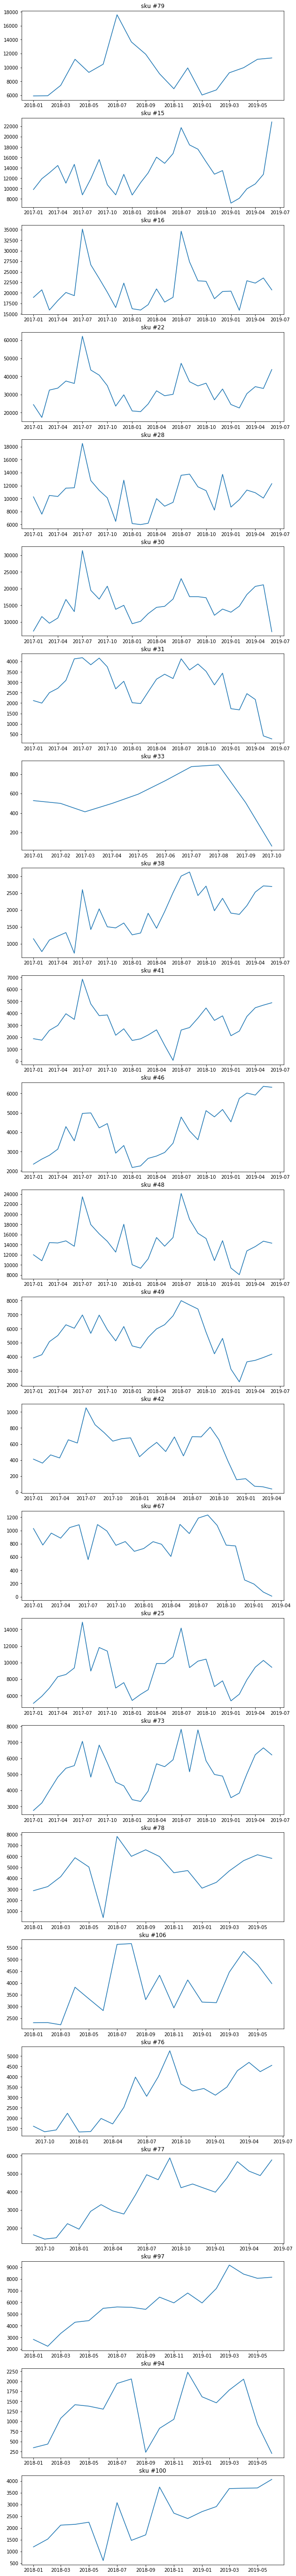

In [144]:
f = plt.figure(figsize=(10,100))
dfc = df.set_index('date').copy()
for num,code in enumerate(dfc["sku_id"].unique()):
    
    ax = f.add_subplot(len(dfc["sku_id"].unique()),1,num+1)
    ax.plot(dfc[dfc["sku_id"] == code]["profit"])
    
    ax.set_title(code)

### MN - Moon

In [146]:
df = data_sales[data_sales["ira"] == "MN"];

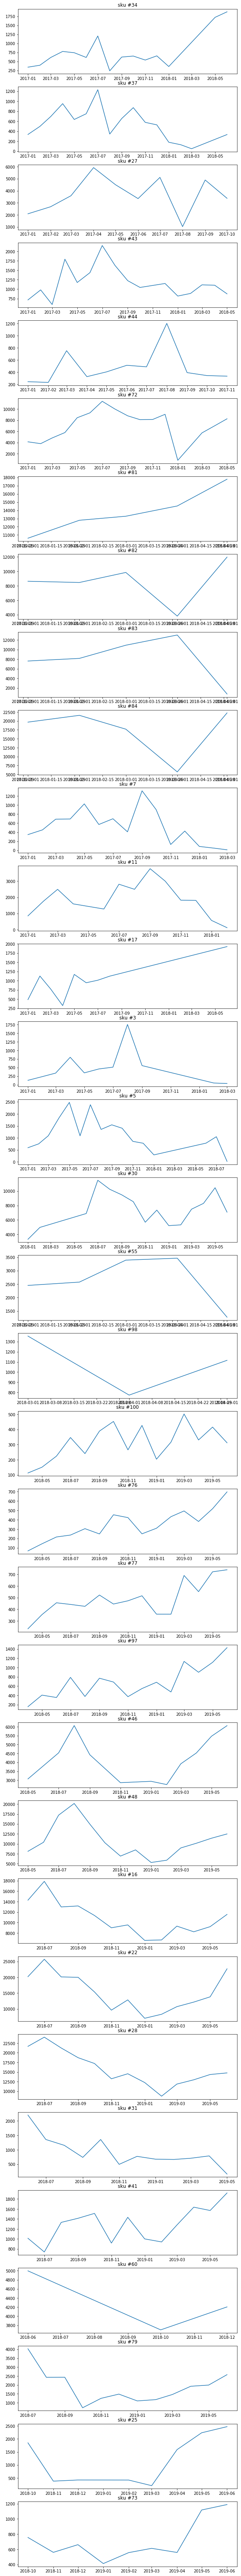

In [148]:
f = plt.figure(figsize=(10,120))
dfc = df.set_index('date').copy()
for num,code in enumerate(dfc["sku_id"].unique()):
    
    ax = f.add_subplot(len(dfc["sku_id"].unique()),1,num+1)
    ax.plot(dfc[dfc["sku_id"] == code]["profit"])
    
    ax.set_title(code)

### PB - Pirate Bay

In [149]:
df = data_sales[data_sales["ira"] == "PB"];

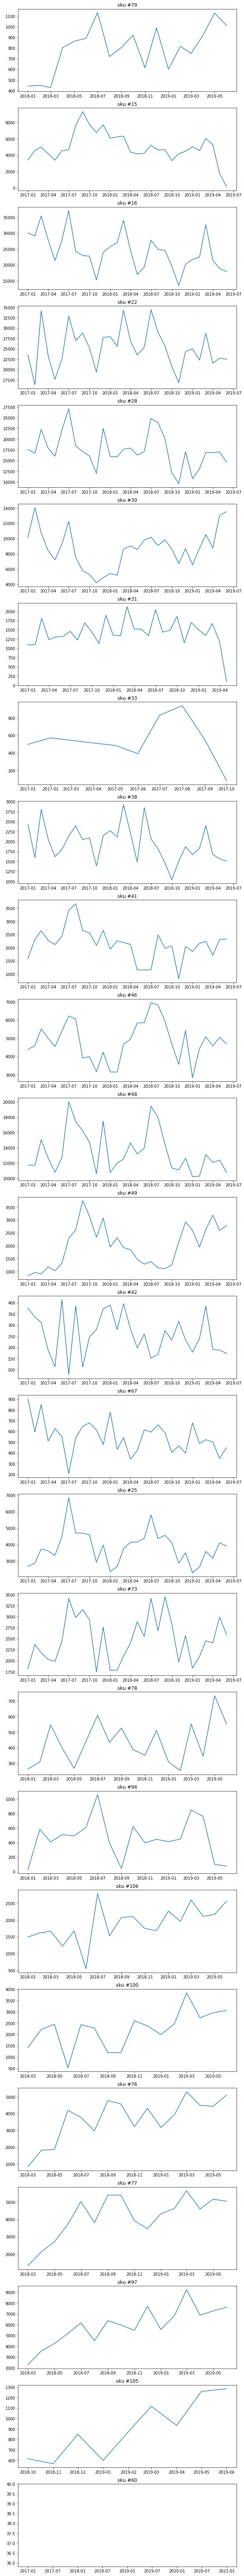

In [150]:
f = plt.figure(figsize=(10,120))
dfc = df.set_index('date').copy()
for num,code in enumerate(dfc["sku_id"].unique()):
    
    ax = f.add_subplot(len(dfc["sku_id"].unique()),1,num+1)
    ax.plot(dfc[dfc["sku_id"] == code]["profit"])
    
    ax.set_title(code)

### VL - Village

In [151]:
df = data_sales[data_sales["ira"] == "PB"];

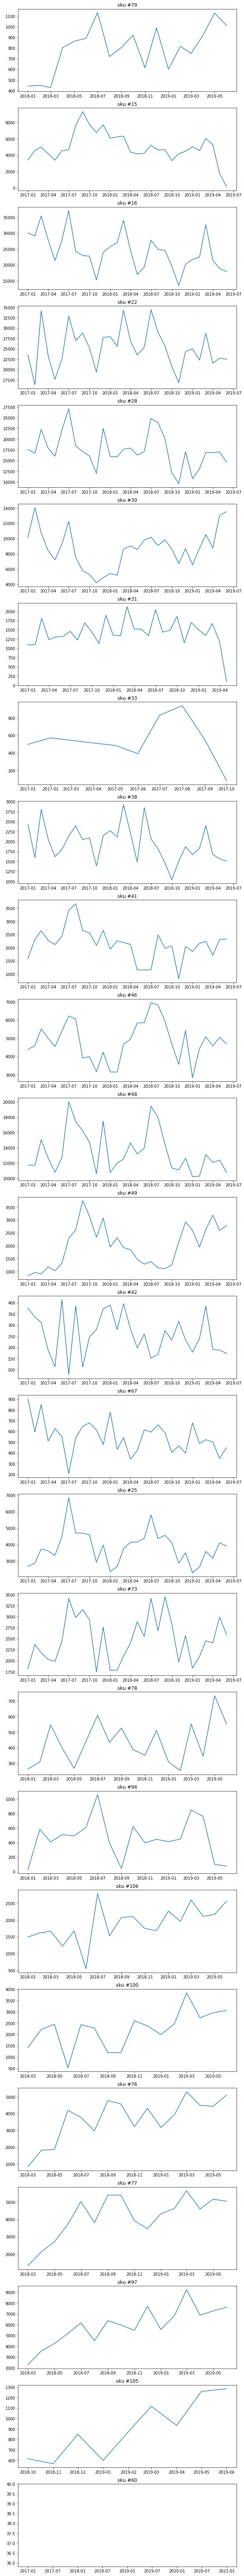

In [152]:
f = plt.figure(figsize=(10,120))
dfc = df.set_index('date').copy()
for num,code in enumerate(dfc["sku_id"].unique()):
    
    ax = f.add_subplot(len(dfc["sku_id"].unique()),1,num+1)
    ax.plot(dfc[dfc["sku_id"] == code]["profit"])
    
    ax.set_title(code)

<p> Целевая переменная - доход по определенному sku (товару) в определенном ira (городе). </p>
<p> На неё влияет: 
    <li> Спрос в этом городе </li>
    <li> Продажи других sku в этом городе </li>
    <li> Исторические данные по продажам в этом городе </li>
</p>
<p> Спрос по городам, вероятно, первое, что нужно прогнозировать. В исторических данных если и присутствует сезонность, то она везде разная. </p>

## <center> Рассмотрим спрос по городам.

### Рассмотрим Alpha city

In [158]:
data_customer.head()

,year,month,ira,customers_type,amount_of_customers
0,2017,1,AC,Archer,679.0
1,2017,1,AC,Monk,1070.0
2,2017,1,AC,Dwarf,610.0
3,2017,1,AC,Centaur,1315.0
4,2017,1,AC,Gremlin,1554.0


### Добавим дату.

In [159]:
data_customer["day"] = 1;
data_customer["date"] = pd.to_datetime(data_customer[["year", "month", "day"]]);

### Посчитаем спрос по месяцам.

In [186]:
data_customer_ac = data_customer[data_customer["ira"] == "AC"][["date", "amount_of_customers"]].groupby("date").sum()
data_customer_ac.head()

,amount_of_customers
date,
2017-01-01,54396.0
2017-02-01,54299.0
2017-03-01,65163.0
2017-04-01,73088.0
2017-05-01,76452.0


### Построим график.

In [211]:
data_customer_ac_x = data_customer_ac.index
data_customer_ac_y = data_customer_ac.values

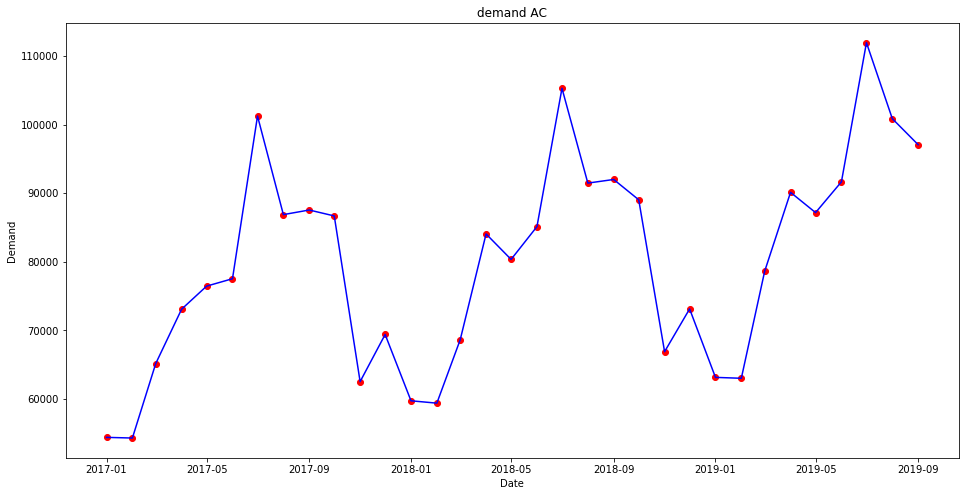

In [198]:
f = plt.figure(figsize=(16,8))
plt.plot(data_customer_ac_x, data_customer_ac_y, "ro")
plt.plot(data_customer_ac_x, data_customer_ac_y, "b")
plt.title("demand AC")
plt.xlabel("Date")
plt.ylabel("Demand")
plt.show()

### Рассмотрим другие города.

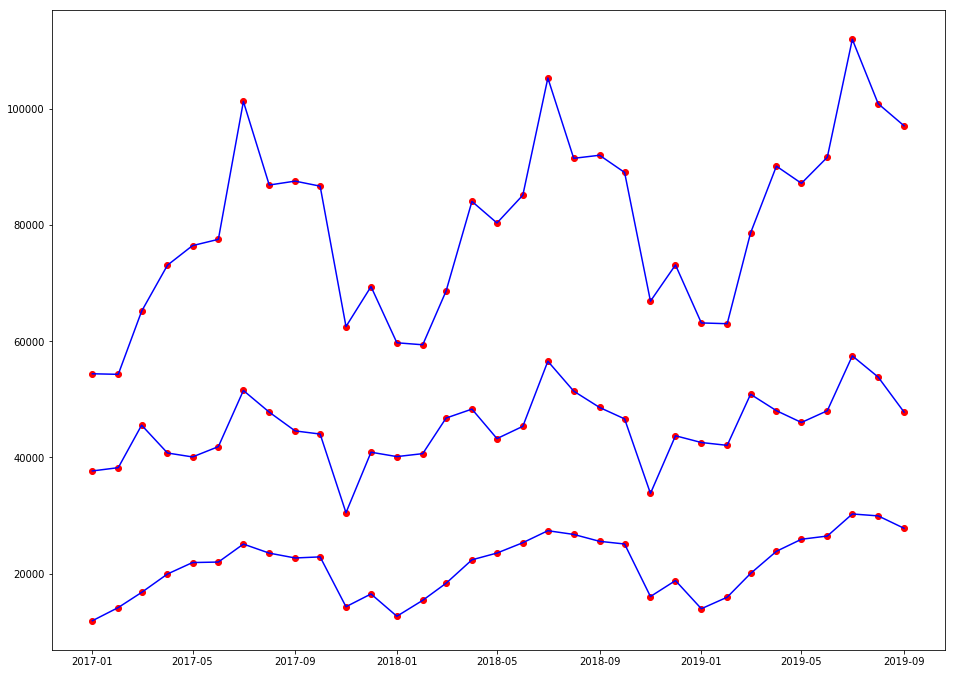

In [209]:
f = plt.figure(figsize=(16,40))
for ira in iras:
    data_customer_ira = data_customer[data_customer["ira"] == ira][["date", "amount_of_customers"]].groupby("date").sum()
    data_customer_ac_x = data_customer_ira.index
    data_customer_ac_y = data_customer_ira.values
    ax = f.add_subplot(len(data_customer["ira"].unique()),1,num+1)
    ax.plot(data_customer_ac_x, data_customer_ac_y, "ro")
    ax.plot(data_customer_ac_x, data_customer_ac_y, "b")
    #ax.title(ira)
 

<p> Спрос во всех городах имеет сезонность. </p>
<p> Какие ещё факторы влияют на этот спрос? Кореллирует ли спрос в разных городах?<p>

# <center> Задача 1 - пронозирование спроса по городам.

In [312]:
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import mean_absolute_error

from itertools import product
import warnings; warnings.simplefilter('ignore')

### <center> Рассмотрим Alpha-city.

In [223]:
data_customer_ac.head()

,amount_of_customers
date,
2017-01-01,54396.0
2017-02-01,54299.0
2017-03-01,65163.0
2017-04-01,73088.0
2017-05-01,76452.0


### Декомпозиция ряда.

Критерий Дики-Фуллера: p=0.950447


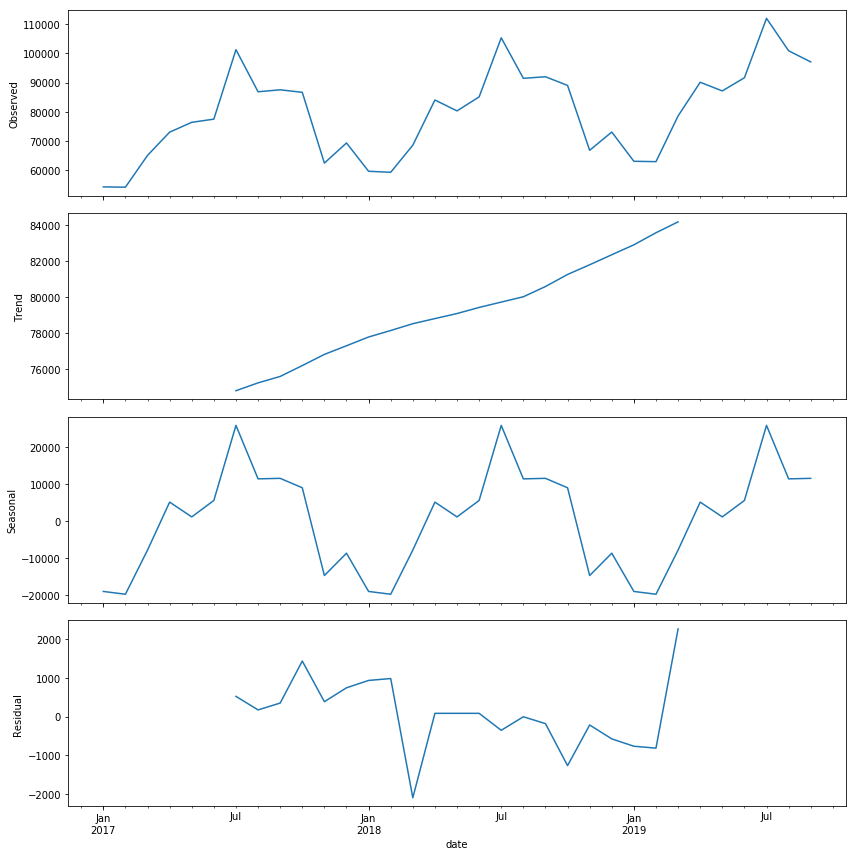

In [224]:
plt.rcParams['figure.figsize'] = (12,12)
sm.tsa.seasonal_decompose(data_customer_ac).plot()
print('Критерий Дики-Фуллера: p=%f' % sm.tsa.stattools.adfuller(data_customer_ac.amount_of_customers)[1])

### Построение модели

Оптимальную модель будем искать в окрестности начальных параметров.

In [239]:
ps = range(0, 5)
d = 1
qs = range(0, 3)
Ps = range(0, 2)
D = 1
Qs = range(0, 2)

In [242]:
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

60

In [247]:
%%time
results = []
best_aic = float("inf")
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(data_customer_ac.amount_of_customers, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

wrong parameters: (0, 0, 0, 1)
wrong parameters: (0, 0, 1, 1)
wrong parameters: (0, 1, 0, 1)
wrong parameters: (0, 1, 1, 1)
wrong parameters: (0, 2, 0, 1)
wrong parameters: (0, 2, 1, 1)
wrong parameters: (1, 0, 0, 1)
wrong parameters: (1, 0, 1, 1)
wrong parameters: (1, 1, 0, 1)
wrong parameters: (1, 1, 1, 1)
wrong parameters: (1, 2, 0, 1)
wrong parameters: (1, 2, 1, 1)
wrong parameters: (2, 0, 0, 1)
wrong parameters: (2, 0, 1, 1)
wrong parameters: (2, 1, 0, 1)
wrong parameters: (2, 1, 1, 1)
wrong parameters: (2, 2, 0, 0)
wrong parameters: (2, 2, 0, 1)
wrong parameters: (2, 2, 1, 0)
wrong parameters: (2, 2, 1, 1)
wrong parameters: (3, 0, 0, 1)
wrong parameters: (3, 0, 1, 1)
wrong parameters: (3, 1, 0, 1)
wrong parameters: (3, 1, 1, 1)
wrong parameters: (3, 2, 0, 0)
wrong parameters: (3, 2, 0, 1)
wrong parameters: (3, 2, 1, 0)
wrong parameters: (3, 2, 1, 1)
wrong parameters: (4, 0, 0, 1)
wrong parameters: (4, 0, 1, 1)
wrong parameters: (4, 1, 0, 1)
wrong parameters: (4, 1, 1, 1)
wrong pa

In [248]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

      parameters         aic
8   (1, 1, 0, 0)  382.749436
22  (4, 1, 0, 0)  382.896968
14  (2, 1, 0, 0)  383.223427
18  (3, 1, 0, 0)  383.225393
0   (0, 0, 0, 0)  383.700022


In [249]:
print(best_model.summary())

                                 Statespace Model Results                                 
Dep. Variable:                amount_of_customers   No. Observations:                   33
Model:             SARIMAX(1, 1, 1)x(0, 1, 0, 12)   Log Likelihood                -188.375
Date:                            Mon, 14 Oct 2019   AIC                            382.749
Time:                                    00:13:58   BIC                            385.737
Sample:                                01-01-2017   HQIC                           383.333
                                     - 09-01-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8147      0.178     -4.578      0.000      -1.164      -0.466
ma.L1          0.7500      0.188   

Критерий Стьюдента: p=0.861658
Критерий Дики-Фуллера: p=0.958532


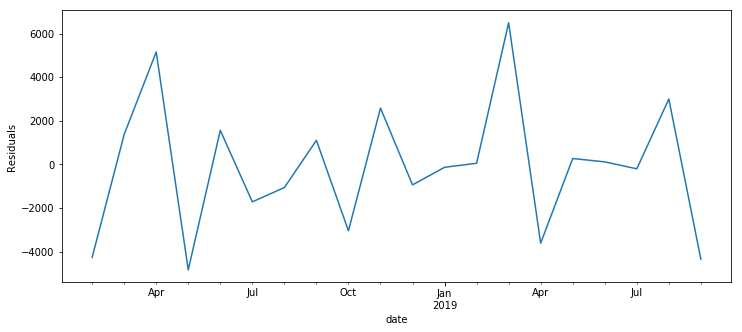

In [252]:
plt.rcParams['figure.figsize'] = (12,5)
best_model.resid[13:].plot()
plt.ylabel('Residuals')
print('Критерий Стьюдента: p=%f' % stats.ttest_1samp(best_model.resid[13:], 0)[1])
print('Критерий Дики-Фуллера: p=%f' % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

plt.show()

### Построение прогноза

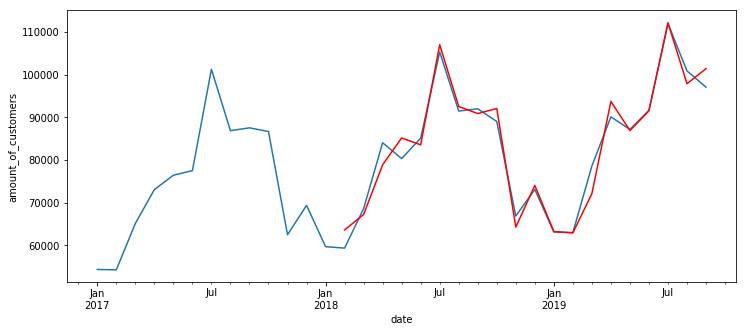

In [261]:
data_customer_ac['model'] = best_model.fittedvalues
data_customer_ac.amount_of_customers.plot()
data_customer_ac.model[13:].plot(color='r')
plt.ylabel('amount_of_customers')
plt.show()

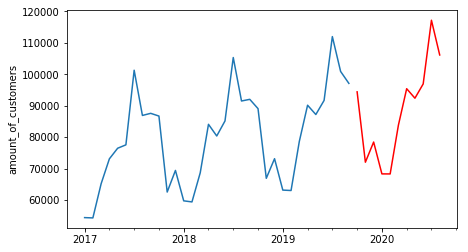

In [296]:
wine2 = data_customer_ac[['amount_of_customers']]
date_list = [datetime.datetime.strptime("2019-09-01", "%Y-%m-%d") + relativedelta(months=x) for x in range(1,12)]
future = pd.DataFrame(index=date_list, columns= wine2.columns)
wine2 = pd.concat([wine2, future])

wine2['forecast'] = best_model.predict(start=33, end=44)
wine2.amount_of_customers.plot()
wine2.forecast.plot(color='r')
plt.ylabel('amount_of_customers')
plt.show()


### Оценим качество модели как MAE / Mean

In [316]:
mean_absolute_error(data_customer_ac["model"].values[1:], data_customer_ac["amount_of_customers"].values[1:]) / np.mean(data_customer_ac["amount_of_customers"].values[1:])

0.0778056598772529

<p> Мне кажется, что попытки сделать ряд стационарным делают эту модель хуже. Прогноз нормальный и без диффиренцирования ряда. </p>

### Прогноз спроса в alpha city

In [329]:
forecast_ac = wine2.forecast.dropna()[:3]
forecast_ac

2019-10-01    94382.197815
2019-11-01    72009.873357
2019-12-01    78426.564324
Name: forecast, dtype: float64

### <center>Рассмотрим  остальные города

In [330]:
data_customer_mn = data_customer[data_customer["ira"] == "MN"][["date", "amount_of_customers"]].groupby("date").sum()

In [333]:
data_customer_mn.head()

,amount_of_customers
date,
2017-01-01,11894.0
2017-02-01,14163.0
2017-03-01,16769.0
2017-04-01,19938.0
2017-05-01,21907.0


### Построение модели.

In [334]:
%%time
results = []
best_aic = float("inf")
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(data_customer_mn.amount_of_customers, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

wrong parameters: (0, 0, 0, 1)
wrong parameters: (0, 0, 1, 1)
wrong parameters: (0, 1, 0, 1)
wrong parameters: (0, 1, 1, 1)
wrong parameters: (0, 2, 0, 1)
wrong parameters: (0, 2, 1, 1)
wrong parameters: (1, 0, 0, 1)
wrong parameters: (1, 0, 1, 1)
wrong parameters: (1, 1, 0, 1)
wrong parameters: (1, 1, 1, 1)
wrong parameters: (1, 2, 0, 1)
wrong parameters: (1, 2, 1, 1)
wrong parameters: (2, 0, 0, 1)
wrong parameters: (2, 0, 1, 1)
wrong parameters: (2, 1, 0, 0)
wrong parameters: (2, 1, 0, 1)
wrong parameters: (2, 1, 1, 0)
wrong parameters: (2, 1, 1, 1)
wrong parameters: (2, 2, 0, 1)
wrong parameters: (2, 2, 1, 1)
wrong parameters: (3, 0, 0, 1)
wrong parameters: (3, 0, 1, 1)
wrong parameters: (3, 1, 0, 1)
wrong parameters: (3, 1, 1, 1)
wrong parameters: (3, 2, 0, 0)
wrong parameters: (3, 2, 0, 1)
wrong parameters: (3, 2, 1, 0)
wrong parameters: (3, 2, 1, 1)
wrong parameters: (4, 0, 0, 1)
wrong parameters: (4, 0, 1, 1)
wrong parameters: (4, 1, 0, 1)
wrong parameters: (4, 1, 1, 1)
wrong pa

In [335]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

     parameters         aic
2  (0, 1, 0, 0)  330.254734
6  (1, 0, 0, 0)  330.585452
3  (0, 1, 1, 0)  331.465394
0  (0, 0, 0, 0)  331.669947
7  (1, 0, 1, 0)  331.780459


In [336]:
print(best_model.summary())

                                 Statespace Model Results                                 
Dep. Variable:                amount_of_customers   No. Observations:                   33
Model:             SARIMAX(0, 1, 1)x(0, 1, 0, 12)   Log Likelihood                -163.127
Date:                            Mon, 14 Oct 2019   AIC                            330.255
Time:                                    00:52:31   BIC                            332.246
Sample:                                01-01-2017   HQIC                           330.643
                                     - 09-01-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2495      0.139     -1.796      0.072      -0.522       0.023
sigma2      7.012e+05   3.76e+05   

Критерий Стьюдента: p=0.934675
Критерий Дики-Фуллера: p=0.958532


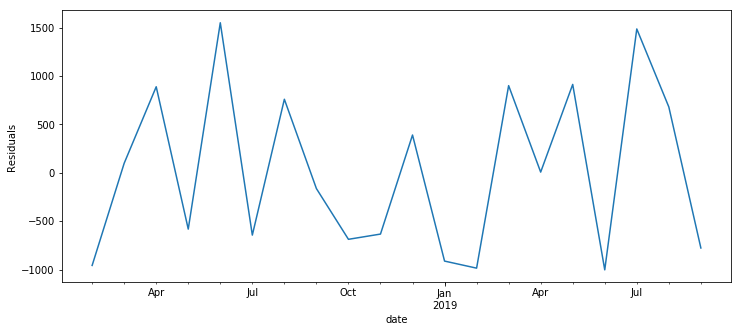

In [337]:
plt.rcParams['figure.figsize'] = (12,5)
best_model.resid[13:].plot()
plt.ylabel('Residuals')
print('Критерий Стьюдента: p=%f' % stats.ttest_1samp(best_model.resid[13:], 0)[1])
print('Критерий Дики-Фуллера: p=%f' % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

plt.show()

### Построение прогноза.

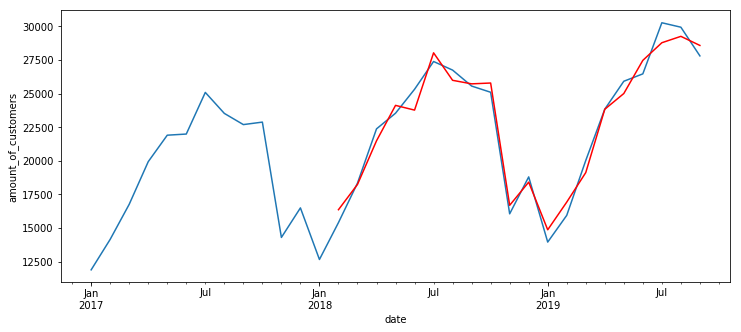

In [338]:
data_customer_mn['model'] = best_model.fittedvalues
data_customer_mn.amount_of_customers.plot()
data_customer_mn.model[13:].plot(color='r')
plt.ylabel('amount_of_customers')
plt.show()

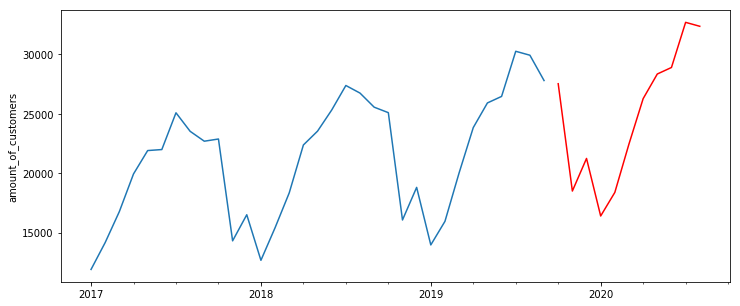

In [339]:
wine2 = data_customer_mn[['amount_of_customers']]
date_list = [datetime.datetime.strptime("2019-09-01", "%Y-%m-%d") + relativedelta(months=x) for x in range(1,12)]
future = pd.DataFrame(index=date_list, columns= wine2.columns)
wine2 = pd.concat([wine2, future])

wine2['forecast'] = best_model.predict(start=33, end=44)
wine2.amount_of_customers.plot()
wine2.forecast.plot(color='r')
plt.ylabel('amount_of_customers')
plt.show()


### Оценим качество модели как MAE / Mean

In [351]:
mean_absolute_error(data_customer_mn["model"].values[1:], data_customer_mn["amount_of_customers"].values[1:]) / np.mean(data_customer_mn["amount_of_customers"].values[1:])

0.07742072492731202

### Прогноз спроса в Moon

In [353]:
forecast_mn = wine2.forecast.dropna()[:3]
forecast_mn

2019-10-01    45832.0
2019-11-01    33000.0
2019-12-01    42926.0
Name: forecast, dtype: float64

### <center> Рассмотрим Pirate Bay

In [342]:
data_customer_pb = data_customer[data_customer["ira"] == "PB"][["date", "amount_of_customers"]].groupby("date").sum()

In [343]:
data_customer_pb.head()

,amount_of_customers
date,
2017-01-01,37673.0
2017-02-01,38236.0
2017-03-01,45552.0
2017-04-01,40760.0
2017-05-01,40082.0


### Построение модели

In [344]:
%%time
results = []
best_aic = float("inf")
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(data_customer_pb.amount_of_customers, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

wrong parameters: (0, 0, 0, 1)
wrong parameters: (0, 0, 1, 1)
wrong parameters: (0, 1, 0, 1)
wrong parameters: (0, 1, 1, 1)
wrong parameters: (0, 2, 0, 0)
wrong parameters: (0, 2, 0, 1)
wrong parameters: (0, 2, 1, 0)
wrong parameters: (0, 2, 1, 1)
wrong parameters: (1, 0, 0, 1)
wrong parameters: (1, 0, 1, 1)
wrong parameters: (1, 1, 0, 1)
wrong parameters: (1, 1, 1, 1)
wrong parameters: (1, 2, 0, 1)
wrong parameters: (1, 2, 1, 1)
wrong parameters: (2, 0, 0, 1)
wrong parameters: (2, 0, 1, 1)
wrong parameters: (2, 1, 0, 1)
wrong parameters: (2, 1, 1, 1)
wrong parameters: (2, 2, 0, 1)
wrong parameters: (2, 2, 1, 1)
wrong parameters: (3, 0, 0, 1)
wrong parameters: (3, 0, 1, 1)
wrong parameters: (3, 1, 0, 1)
wrong parameters: (3, 1, 1, 1)
wrong parameters: (3, 2, 0, 0)
wrong parameters: (3, 2, 0, 1)
wrong parameters: (3, 2, 1, 0)
wrong parameters: (3, 2, 1, 1)
wrong parameters: (4, 0, 0, 1)
wrong parameters: (4, 0, 1, 1)
wrong parameters: (4, 1, 0, 1)
wrong parameters: (4, 1, 1, 1)
wrong pa

In [345]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

      parameters         aic
0   (0, 0, 0, 0)  371.001828
20  (4, 0, 0, 0)  371.400625
4   (1, 0, 0, 0)  372.033445
2   (0, 1, 0, 0)  372.067113
16  (3, 0, 0, 0)  372.137605


In [346]:
print(best_model.summary())

                                 Statespace Model Results                                 
Dep. Variable:                amount_of_customers   No. Observations:                   33
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -184.501
Date:                            Mon, 14 Oct 2019   AIC                            371.002
Time:                                    01:02:14   BIC                            371.998
Sample:                                01-01-2017   HQIC                           371.196
                                     - 09-01-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.959e+06   1.63e+06      3.652      0.000    2.76e+06    9.16e+06
Ljung-Box (Q):                     

Критерий Стьюдента: p=0.774289
Критерий Дики-Фуллера: p=0.958532


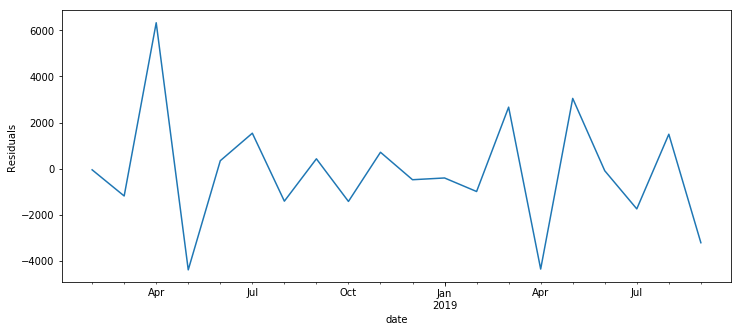

In [347]:
plt.rcParams['figure.figsize'] = (12,5)
best_model.resid[13:].plot()
plt.ylabel('Residuals')
print('Критерий Стьюдента: p=%f' % stats.ttest_1samp(best_model.resid[13:], 0)[1])
print('Критерий Дики-Фуллера: p=%f' % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

plt.show()

### Построение прогноза.

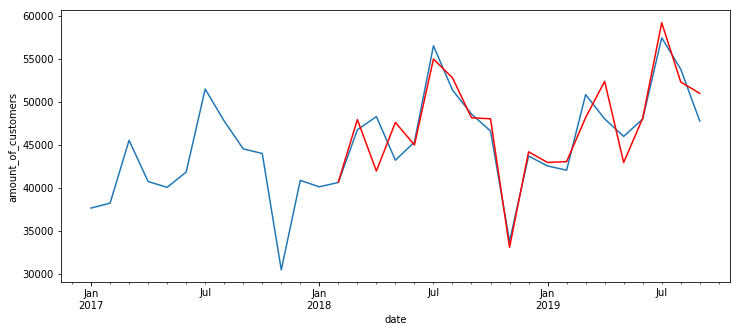

In [349]:
data_customer_pb['model'] = best_model.fittedvalues
data_customer_pb.amount_of_customers.plot()
data_customer_pb.model[13:].plot(color='r')
plt.ylabel('amount_of_customers')
plt.show()

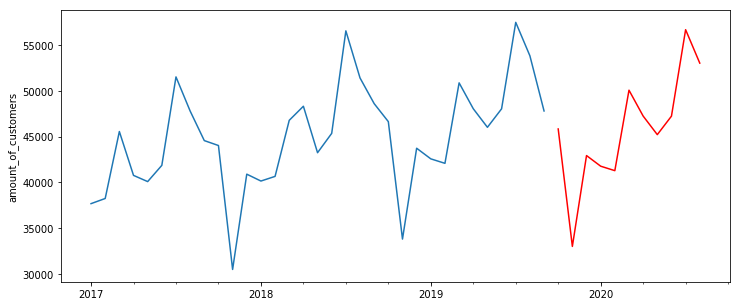

In [350]:
wine2 = data_customer_pb[['amount_of_customers']]
date_list = [datetime.datetime.strptime("2019-09-01", "%Y-%m-%d") + relativedelta(months=x) for x in range(1,12)]
future = pd.DataFrame(index=date_list, columns= wine2.columns)
wine2 = pd.concat([wine2, future])

wine2['forecast'] = best_model.predict(start=33, end=44)
wine2.amount_of_customers.plot()
wine2.forecast.plot(color='r')
plt.ylabel('amount_of_customers')
plt.show()


### Оценим качество модели как MAE / Mean

In [352]:
mean_absolute_error(data_customer_pb["model"].values[1:], data_customer_pb["amount_of_customers"].values[1:]) / np.mean(data_customer_pb["amount_of_customers"].values[1:])

0.08723263995658898

### Прогноз спроса в Pirate Bay

In [354]:
forecast_pb = wine2.forecast.dropna()[:3]
forecast_pb

2019-10-01    45832.0
2019-11-01    33000.0
2019-12-01    42926.0
Name: forecast, dtype: float64

### <center> Получили следующий прогноз спроса.

In [361]:
print("Alpha city")
print()
print(forecast_ac)
print()
print("Moon")
print()
print(forecast_mn)
print()
print("Pirate Bay")
print()
print(forecast_pb)

Alpha city

2019-10-01    94382.197815
2019-11-01    72009.873357
2019-12-01    78426.564324
Name: forecast, dtype: float64

Moon

2019-10-01    45832.0
2019-11-01    33000.0
2019-12-01    42926.0
Name: forecast, dtype: float64

Pirate Bay

2019-10-01    45832.0
2019-11-01    33000.0
2019-12-01    42926.0
Name: forecast, dtype: float64


# <center> Задача 2 -  Определить факторы для прогоза sku.